In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Load data

This data has been webscraped or downloaded via API from goodreads.com. 

In [2]:
# reviews_df = pd.read_csv('../data/preprocessed/reviews.csv')
# books_df = pd.read_csv('../data/preprocessed/books.csv')
reviews_df = pd.read_csv('../data/preprocessed/reviews_nlp.csv')
books_df = pd.read_csv('../data/preprocessed/books_nlp.csv')

In [3]:
reviews_df.head()

book_id  user_id  user_rating  \
0      2612        1            4   
1   8664353        1            5   
2   2767052        1            5   
3  13526165        1            5   
4    128029        1            5   

                                         user_review  review_length  
0  Really good book. It read like a bestseller (q...           1931  
1  Wow. Amazing story, and well told - kept me up...           1419  
2  I cracked and finally picked this up. Very enj...           1317  
3  My wife suggested I read this book, and I resi...           1024  
4  I'm not sure if I love Khaled's characters (se...            800

In [4]:
books_df.head()

id   best_id                                              title  \
0         1         1  Harry Potter and the Half-Blood Prince (Harry ...   
1  10032672  10032672                            The Language of Flowers   
2     10210     10210                                          Jane Eyre   
3  10357575  10357575                                               1Q84   
4     10441     10441                       The Memory Keeper's Daughter   

                author                                        description  \
0         J.K. Rowling  The war against Voldemort is not going well; e...   
1  Vanessa Diffenbaugh  A mesmerizing, moving, and elegantly written d...   
2     Charlotte Brontë  Clicca qui per l'edizione "Storie senza tempo"...   
3      Haruki Murakami  The year is 1984 and the city is Tokyo.\nA you...   
4          Kim Edwards  On a winter night in 1964, Dr. David Henry is ...   

     year  num_pages     format media_type language  \
0  2005.0      652.0  Paperback       book      eng   
1  2011.0      323.0  Hardcover       book      eng   
2  1847.0      532.0  Paperback       book      eng   
3  2009.0      925.0  Hardcover       book      eng   
4  2005.0      401.0  Paperback       book      eng   

                                           image_url  average_rating  \
0  https://i.gr-assets.com/images/S/compressed.ph...            4.57   
1  https://i.gr-assets.com/images/S/compressed.ph...            4.08   
2  https://i.gr-assets.com/images/S/compressed.ph...            4.12   
3  https://i.gr-assets.com/images/S/compressed.ph...            3.92   
4  https://i.gr-assets.com/images/S/compressed.ph...            3.67   

                                         rating_dist  ratings_count  \
0  5:1598220|4:570051|3:163397|2:25942|1:10453|to...        2368063   
1  5:68037|4:82568|3:33895|2:6560|1:1830|total:19...         192890   
2  5:727142|4:490354|3:252280|2:75489|1:42254|tot...        1587519   
3  5:65639|4:71357|3:38844|2:12954|1:5202|total:1...         193996   
4  5:130435|4:201228|3:155178|2:48943|1:19930|tot...         555714   

   text_reviews_count                                            shelves  
0               38135  {"fantasy": 46663, "favorites": 39215, "young-...  
1               19672  {"fiction": 2505, "book-club": 2336, "favorite...  
2               40955  {"classics": 35998, "favorites": 21952, "ficti...  
3               17513  {"fiction": 4179, "favorites": 2487, "fantasy"...  
4               19232  {"fiction": 4221, "book-club": 1305, "books-i-...

# Books analysis

In [23]:
books_df.drop(['id', 'best_id'], axis=1).describe()

year    num_pages  average_rating  ratings_count  \
count  3717.000000  3661.000000     3718.000000   3.718000e+03   
mean   1995.614743   371.035783        3.944298   1.425342e+05   
std      92.620094   173.964027        0.274459   3.385833e+05   
min    -750.000000     0.000000        2.440000   1.582000e+03   
25%    2001.000000   283.000000        3.790000   2.467525e+04   
50%    2008.000000   342.000000        3.960000   5.299050e+04   
75%    2012.000000   424.000000        4.130000   1.267052e+05   
max    2020.000000  4100.000000        4.820000   6.823144e+06   

       text_reviews_count  
count         3718.000000  
mean          7607.876278  
std          11346.876541  
min            173.000000  
25%           2215.000000  
50%           4127.500000  
75%           8164.000000  
max         170113.000000

In [24]:
num_of_books = books_df.loc[books_df.media_type == 'book'].count().id
print(f'There are {num_of_books} books in the dataframe after filtering out no book media.')

There are 3718 books in the dataframe after filtering out no book media.


In [25]:
not_best_edition_books = books_df.loc[books_df.id != books_df.best_id]
print(f'There are {not_best_edition_books.count().id} books which are not represented by its best editions.')

# test = not_best_edition_books.loc[~not_best_edition_books.best_id.isin(books_df.id)]
# reviews_df.groupby('book_id').count().user_id[test.id.values].sort_values()

There are 0 books which are not represented by its best editions.


In [26]:
books_df.language.unique()

array(['eng', 'en-US', 'en-GB', 'en-CA', 'en'], dtype=object)

language
eng    3718
Name: id, dtype: int64
There are 3718 books which have been written in english and 0 in other language.


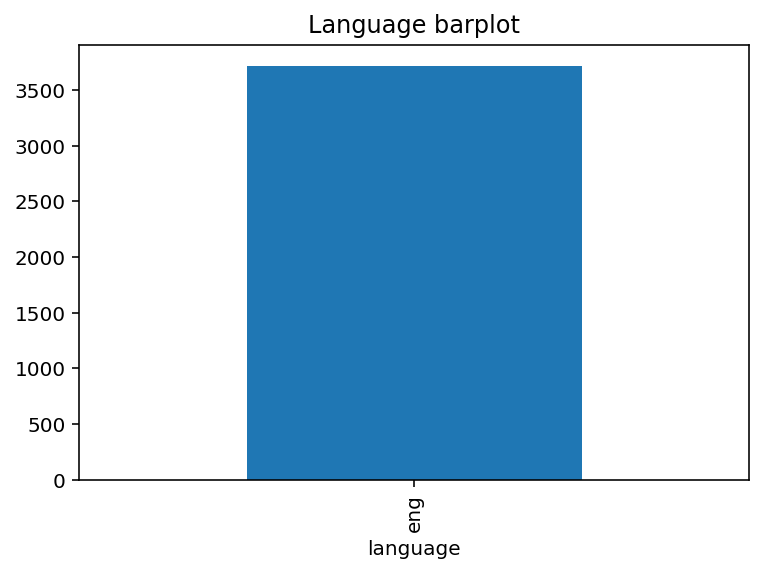

In [27]:
books_df.loc[books_df.language.isin([ 'eng', 'en-US', 'en-GB',  'en-CA', 'en' ]), 'language'] = 'eng'
languages = books_df.groupby(['language']).count().id.sort_values(ascending=False)
print(languages)
languages.plot.bar()
plt.title("Language barplot")
english_lang = books_df.loc[books_df.language == 'eng'].count().id
not_english_lang = books_df.loc[books_df.language != 'eng'].count().id
print(f'There are {english_lang} books which have been written in english and {not_english_lang} in other language.')

In [10]:
books_df.media_type.unique()

array(['book', 'not a book', nan, 'periodical', 'article'], dtype=object)

media_type
book          22368
periodical       32
not a book       25
article          10
Name: id, dtype: int64
There are 22368 books and 130 other media types.


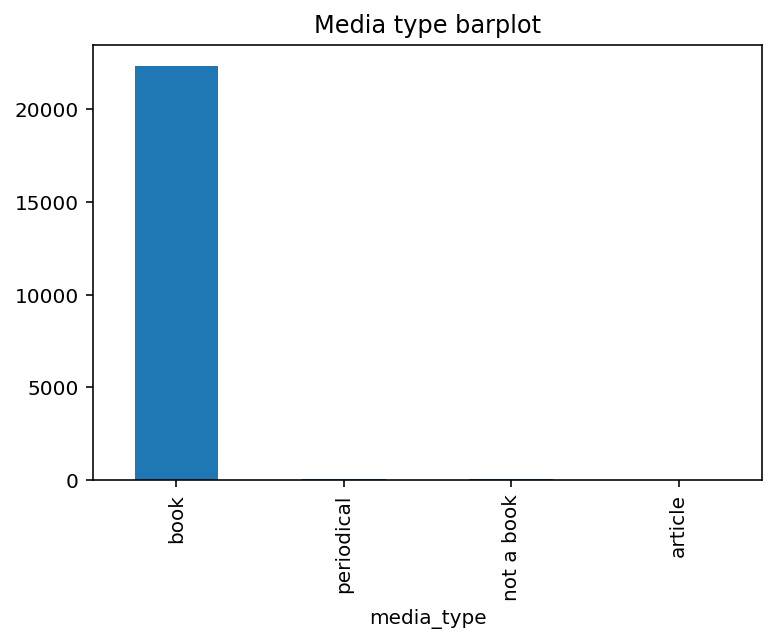

In [11]:
media_types = books_df.groupby(['media_type']).count().id.sort_values(ascending=False)
print(media_types)
media_types.plot.bar()
plt.title("Media type barplot")
book_type = books_df.loc[books_df.media_type == 'book'].count().id
not_book_type = books_df.loc[books_df.media_type != 'book'].count().id
print(f'There are {book_type} books and {not_book_type} other media types.')

In [12]:
books_df.format.unique()

array(['Paperback', 'Hardcover', nan, 'Kindle Edition', 'ebook',
       'Mass Market Paperback', 'Audio CD', 'Slipcased Hardcover',
       'Audio Cassette', 'Comics', 'Board Book', 'paperback',
       'Trade Paperback', 'Box Set', 'Paper back', 'Leather Bound',
       'Library Binding', 'Audible Audio', 'Nook', 'MP3 CD', 'Audiobook',
       'Comic Book', 'Broschiert', 'Science Fiction Book Club Omnibus',
       'Audio', 'Unknown Binding', 'رقعی', 'Paperback ', 'paper',
       'Slipcase Hardcover', 'Novelty Book', 'Softcover',
       'Paperback and online', 'Board book', 'Mass Market Paperback ',
       'Spiral-bound', 'Boxed Set', 'Loose-Leaf', 'コミック', 'Trade Paper',
       'pocket', 'Graphic Novel', 'Hardcover / گالینگور - وزیری'],
      dtype=object)

In [13]:
formats = books_df.groupby(['format']).count().id.sort_values(ascending=False)
print(formats)


format
Paperback                            10322
Hardcover                             6753
Mass Market Paperback                 1695
Kindle Edition                         823
ebook                                  432
Audio CD                                79
Audiobook                               34
Trade Paperback                         30
Comics                                  30
Board Book                              29
Audio Cassette                          18
Unknown Binding                         17
Library Binding                         11
Audible Audio                            9
paperback                                8
Leather Bound                            7
Paper back                               6
MP3 CD                                   5
Board book                               5
Slipcased Hardcover                      4
Nook                                     4
Spiral-bound                             3
paper                                    2
رقعی

Text(0.5, 1.0, 'Format barplot')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12467 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12511 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12483 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12467 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12511 missing from cur

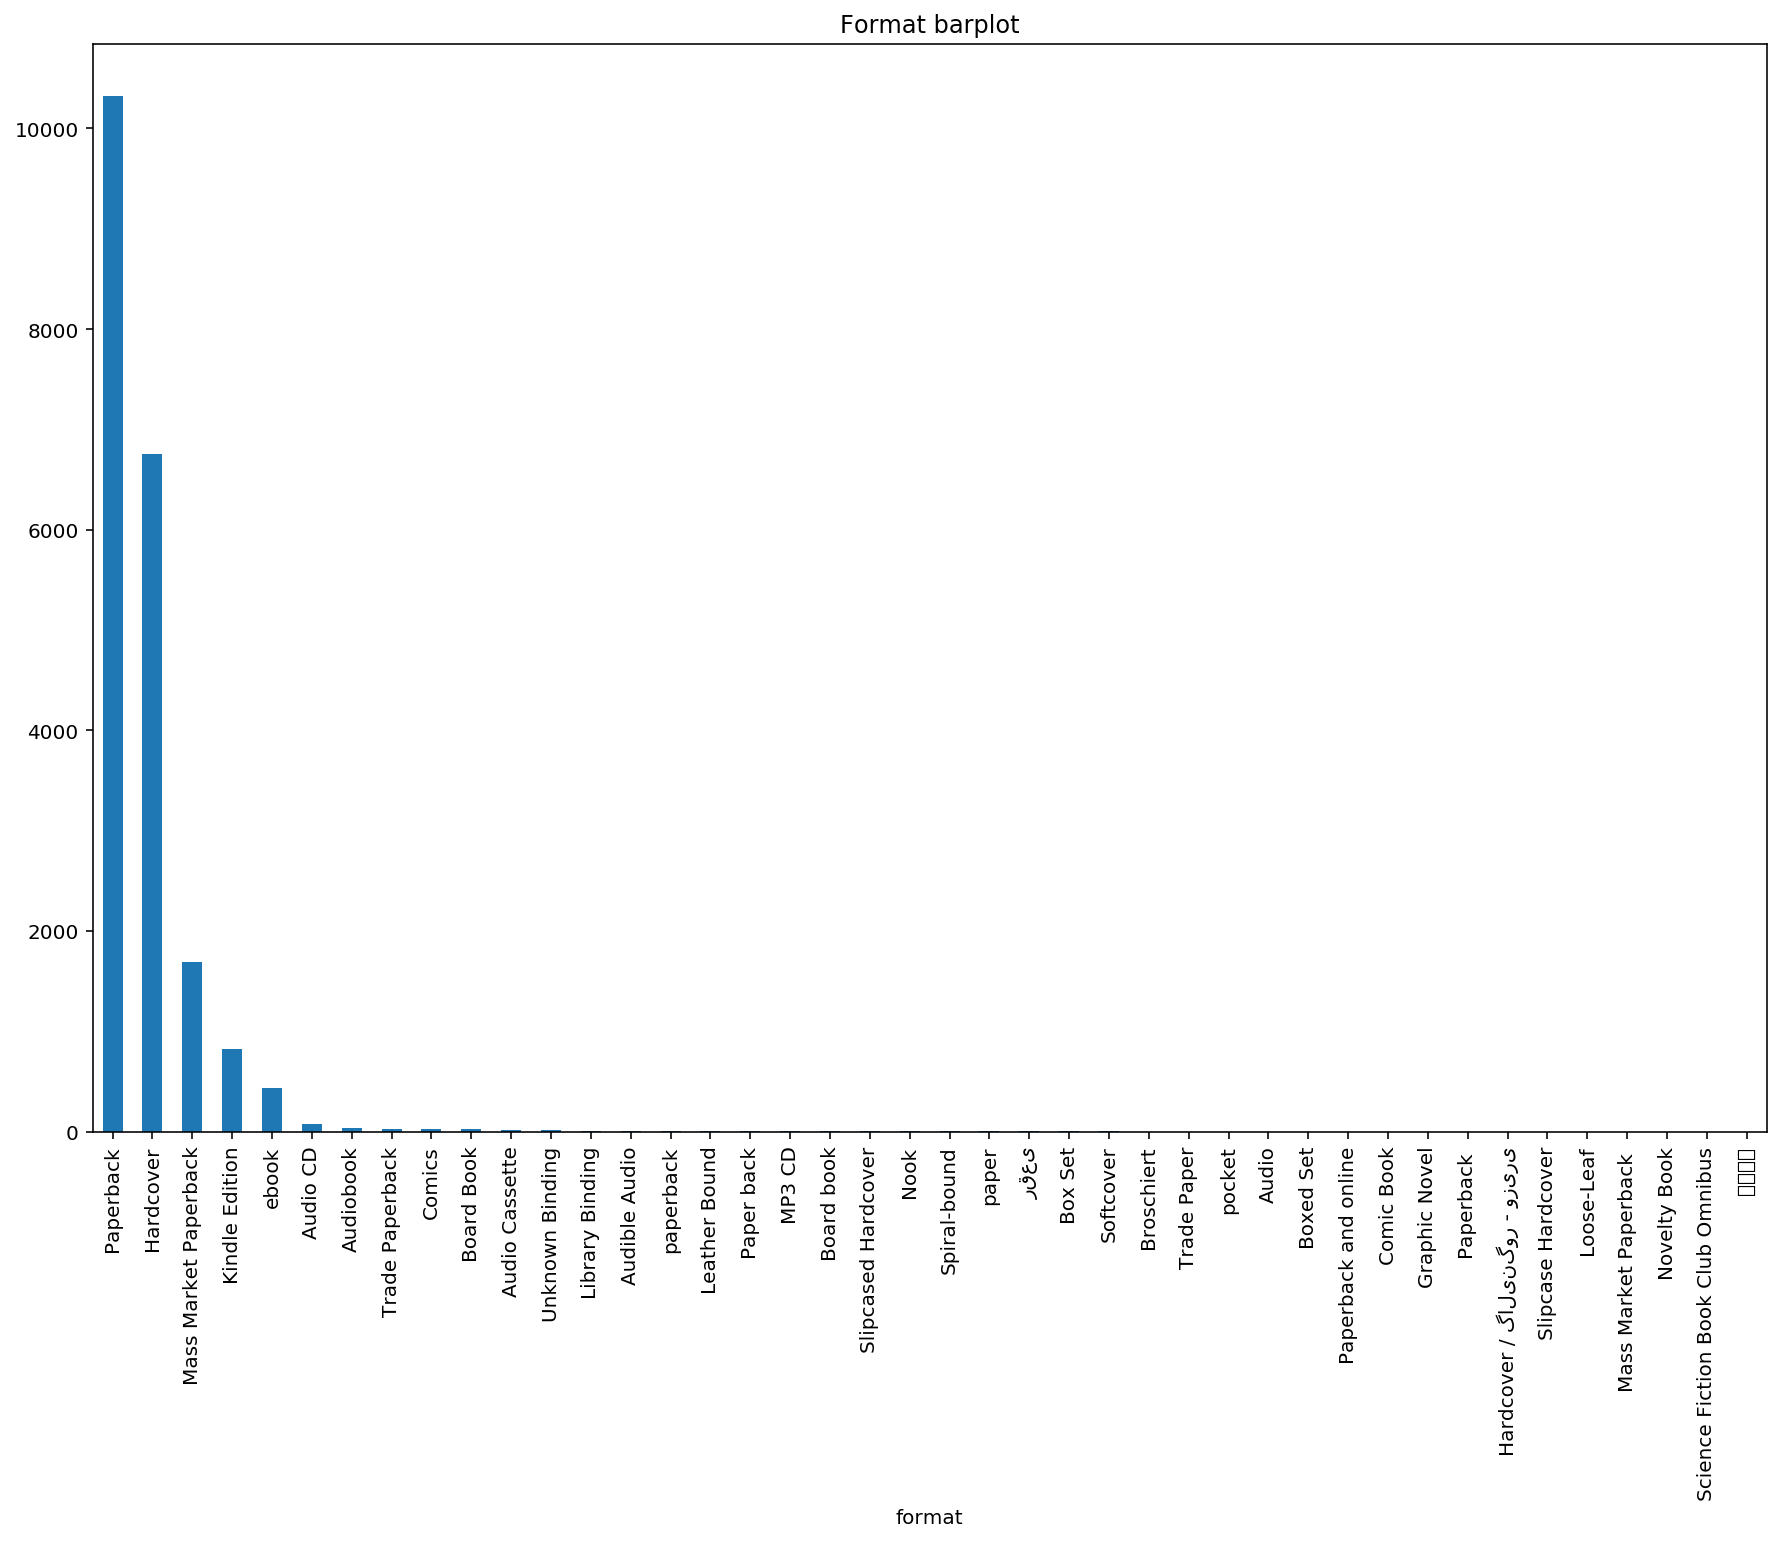

In [14]:
formats.plot.bar(figsize=(15,10))
plt.title("Format barplot")

## Numerical features' distributions

In [4]:
norm_pdf = lambda x, mu, sigma: np.exp(-((x-mu)/sigma)**2/2)/(np.sqrt(2*np.pi)*sigma)

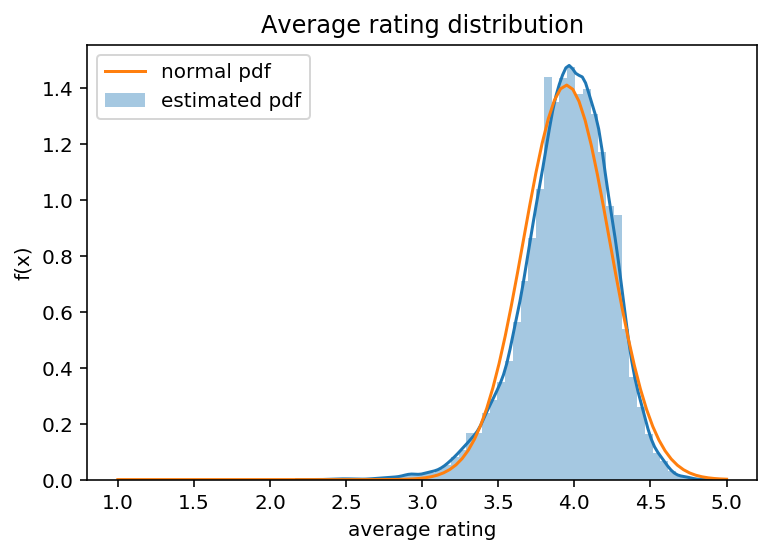

In [14]:
sns.distplot(books_df.average_rating.values, kde=True)
plt.title('Average rating distribution')
plt.xlabel('average rating')
plt.ylabel('f(x)')

x = np.linspace(1, 5, 100)
plt.plot(x, norm_pdf(x, books_df.average_rating.mean(), books_df.average_rating.std()))
plt.legend(['normal pdf', 'estimated pdf'])

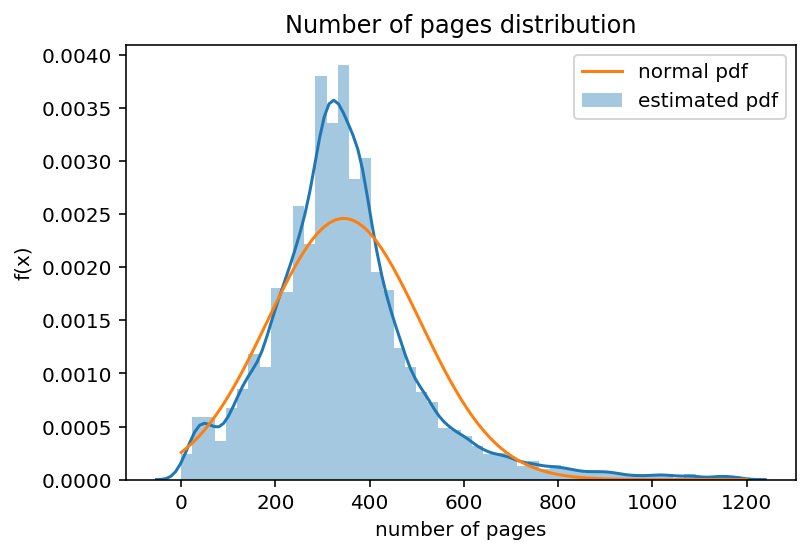

In [50]:
num_of_pages_threshold = 1200
partial_num_of_pages = books_df.num_pages[books_df.num_pages < num_of_pages_threshold]

sns.distplot(partial_num_of_pages.values, kde=True)
plt.title('Number of pages distribution')
plt.xlabel('number of pages')
plt.ylabel('f(x)')

x = np.linspace(books_df.num_pages.min(), num_of_pages_threshold, 100)
plt.plot(x, norm_pdf(x, partial_num_of_pages.mean(), partial_num_of_pages.std()))
plt.legend(['normal pdf', 'estimated pdf'])

In [52]:
#TODO: distributions of year, ratings_count, text_reviews_count; maybe without comparison to normal distribution

## Books popularity

In [15]:
popular_books_ids = reviews_df.groupby(['book_id']).count().user_id.sort_values(ascending=False)
books_by_popularity = books_df.set_index('id').reindex(popular_books_ids.index)
books_by_popularity.loc[:, ['title', 'author']].iloc[:10, :]

title  \
book_id                                                      
3        Harry Potter and the Sorcerer's Stone (Harry P...   
4671                                      The Great Gatsby   
2767052            The Hunger Games (The Hunger Games, #1)   
2657                                 To Kill a Mockingbird   
41865                              Twilight (Twilight, #1)   
5470                                                  1984   
5107                                The Catcher in the Rye   
968                 The Da Vinci Code (Robert Langdon, #2)   
5        Harry Potter and the Prisoner of Azkaban (Harr...   
890                                        Of Mice and Men   

                      author  
book_id                       
3               J.K. Rowling  
4671     F. Scott Fitzgerald  
2767052      Suzanne Collins  
2657              Harper Lee  
41865        Stephenie Meyer  
5470           George Orwell  
5107           J.D. Salinger  
968                Dan Brown  
5               J.K. Rowling  
890           John Steinbeck

These are 10 most popular books based on downloaded sample of users readings.

In [97]:
#TODO: distribution of popularity (like below, but described)

# NLP Analysis

In [36]:
text_reviews = reviews_df.loc[reviews_df.user_review != "None"]
print(f'There are {text_reviews.count().book_id} text reviews.')
text_reviews = text_reviews.drop(text_reviews.loc[text_reviews.user_rating == -1].index)
text_reviews['category'] = text_reviews.user_rating.map({5: 'good', 4: 'good', 3: 'moderate', 2: 'bad', 1: 'bad'})
text_reviews.to_csv('../data/reviews_test.csv', index=False)

There are 13623 text reviews.


Text(0, 0.5, 'f(x)')

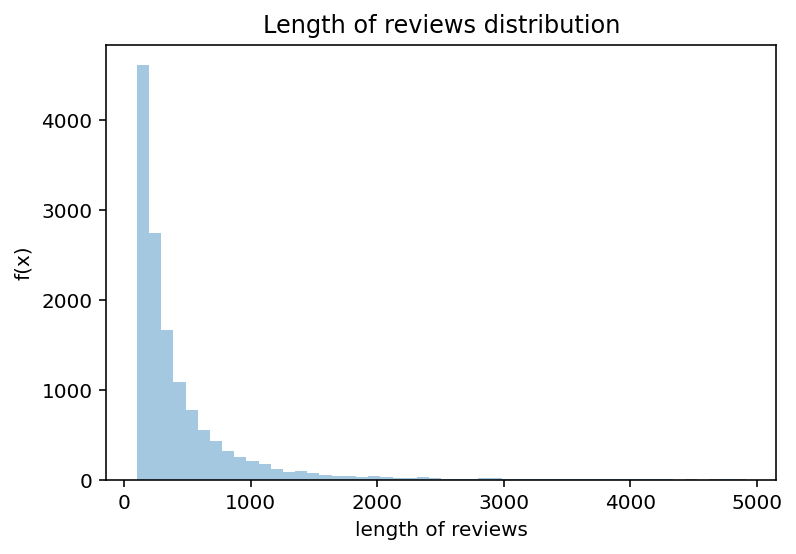

In [6]:
text_reviews['review_length'] = text_reviews.user_review.apply(len)

review_length_range = (50, 5000)
text_reviews_slice = text_reviews.loc[(text_reviews.review_length >= review_length_range[0]) & (text_reviews.review_length <= review_length_range[1])]
sns.distplot(text_reviews_slice.review_length.values, kde=False)
plt.title('Length of reviews distribution')
plt.xlabel('length of reviews')
plt.ylabel('f(x)')


Text(0, 0.5, 'f(x)')

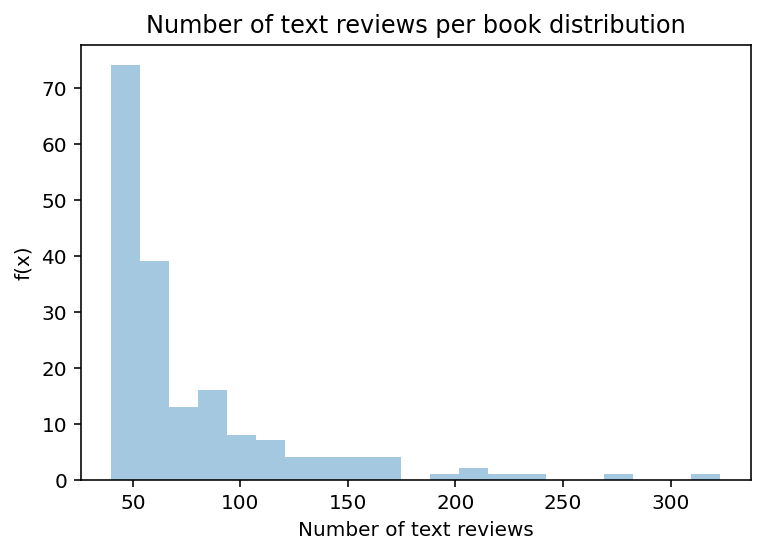

In [7]:
text_reviews_grouped = text_reviews.groupby('book_id').count().user_review.values
sns.distplot(text_reviews_grouped, kde=False)
plt.title('Number of text reviews per book distribution')
plt.xlabel('Number of text reviews')
plt.ylabel('f(x)')


In [28]:
text_reviews.groupby('book_id').count().user_review.sort_values(ascending=False).iloc[:400]
# (text_reviews.groupby('book_id').count().user_review.sort_values(ascending=False) > 2).sum()
reviews_df.groupby('user_rating').count().user_review.sort_values(ascending=False)
# reviews_df.loc[reviews_df.user_rating == -1].user_review.iloc[90]

user_rating
 5    5007
 4    4406
 3    2431
 2     999
 1     499
-1     281
Name: user_review, dtype: int64

In [41]:
import csv
sample = text_reviews_slice.sample(n=5000, axis=0)
sample['user_review'].to_csv('text_reviews_slice.csv', index=False, header=False, quoting=csv.QUOTE_NONE, escapechar = ' ')

In [39]:
text_reviews_slice.sample(n=5, axis=0)

book_id  user_id  user_rating  \
246010    6493208  1078224            2   
56324    13537891  1019938            3   
1072142  12880428  9988111            3   
228507       3109  1075657            4   
916602       4588   833024            4   

                                               user_review  review_length  
246010   This book contains a lot of medical/scientific...            425  
56324    There's two things that drag down this book. O...            881  
1072142  Very intellectual with references to Jesuit me...            126  
228507   This book changed my life- a must read for any...             67  
916602   Oskar, the protagonist, is quirky and entirely...            242

In [3]:
reviews_df.sort_values(by='book_id').head(5)

book_id  user_id  user_rating user_review
432531        1    34621            5        None
518910        1    40749            5        None
19180         1   112687            4        None
767585        1  6525904            5        None
475564        1  3536464            5        None

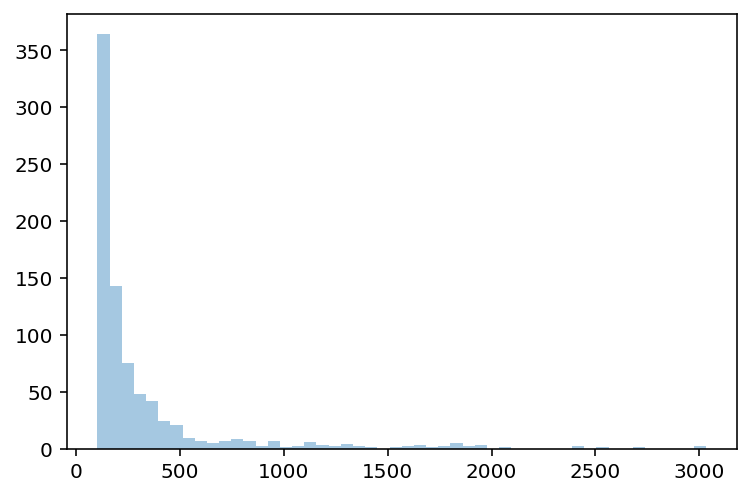

In [10]:
books_popularity = reviews_df.groupby(['book_id']).count()['user_id']
sns.distplot(books_popularity[books_popularity > 100].values, kde=False)

In [18]:
np.sum(books_popularity > 1)

22936

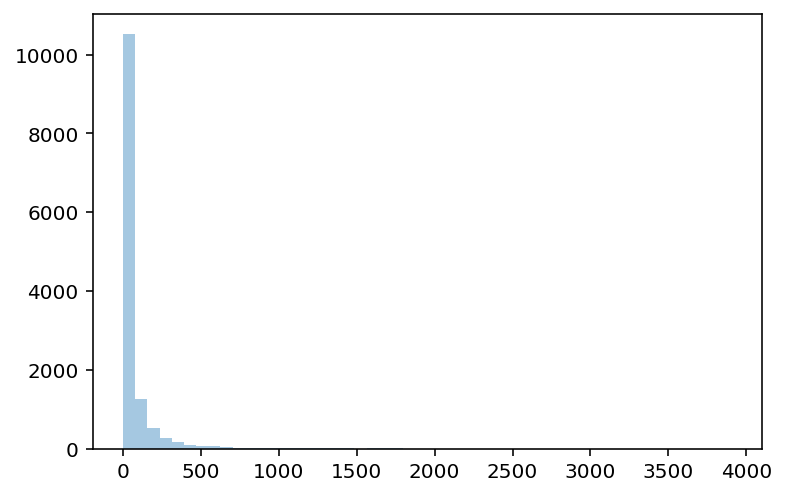

In [12]:
reviews_per_user = reviews_df.groupby(['user_id']).count()['book_id']
sns.distplot(reviews_per_user.values, kde=False)

In [33]:
reviews_df[reviews_df['book_id'] == 10]

book_id  user_id  user_rating  \
39897        10  1627164            4   
150382       10     4190            5   
153499       10     4674            5   
155399       10        5            4   
170956       10      550            5   
193903       10      689            5   
199722       10     7818            5   

                                              user_review  
39897                                                None  
150382  yes, i had to post these. you can read them ea...  
153499                                               None  
155399                        Come-on! It's Harry Potter!  
170956                        No explanation needed......  
193903                                               None  
199722  Who can resist Harry? So sad the magic is comi...

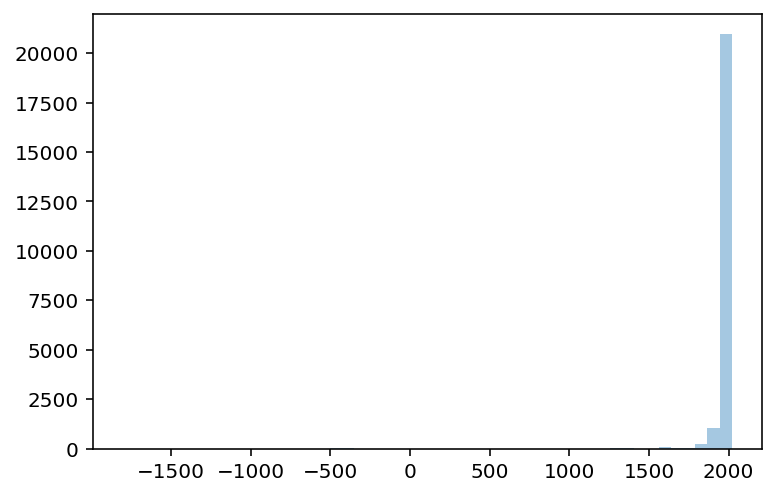

In [88]:
books_years = books_df.year
sns.distplot(books_years.values, kde=False)


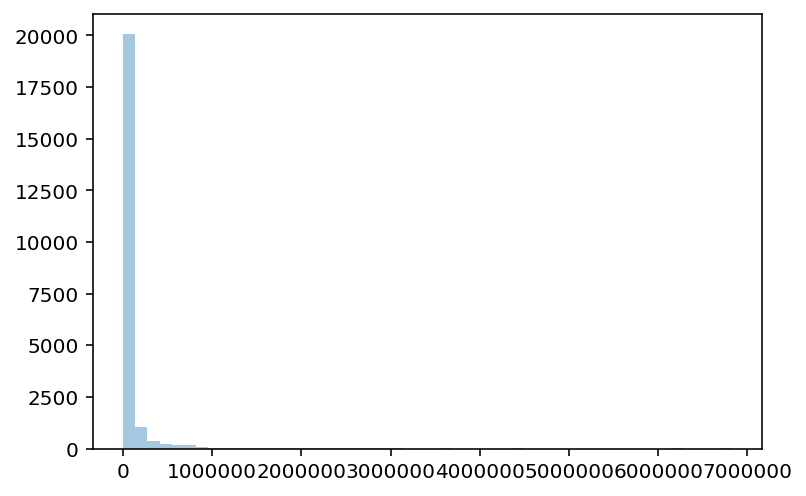

In [95]:
sns.distplot(books_df.ratings_count.values, kde=False)

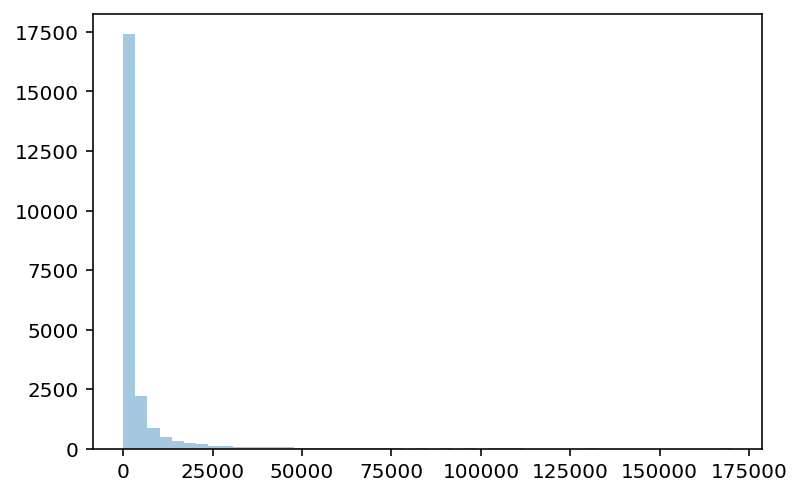

In [97]:
sns.distplot(books_df.text_reviews_count.values, kde=False)